<a href="https://colab.research.google.com/github/ImadT/Fraud-detection/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exporter les donnees du drive



In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option("display.max_rows", None) 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_identity = pd.read_csv("/content/drive/MyDrive/2020 2021/Projet ML/train_identity.csv")
print(train_identity.shape)
train_identity.head()

(144233, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
train_transaction = pd.read_csv("/content/drive/MyDrive/2020 2021/Projet ML/train_transaction.csv")
print(train_transaction.shape)
train_transaction.head()

(590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
test_identity = pd.read_csv("/content/drive/MyDrive/2020 2021/Projet ML/test_identity.csv")
print(test_identity.shape)
test_identity.head()

(141907, 41)


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [7]:
test_transaction = pd.read_csv("/content/drive/MyDrive/2020 2021/Projet ML/test_transaction.csv")
print(test_transaction.shape)
test_transaction.head()

(506691, 393)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merge Transaction and identity

In [8]:
train = pd.merge(train_transaction, train_identity, how='left', 
                 on='TransactionID')

In [9]:
# rename columns for test_identity
test_identity.columns = train_identity.columns

test = pd.merge(test_transaction, test_identity, how='left', 
                 on='TransactionID')

#### Data Casting

In [10]:
"""
#catagorical variables

## Transaction variables
ProductCD
card1 - card6
addr1, addr2
P_emaildomain
R_emaildomain
M1 - M9

## Identity variables
DeviceType
DeviceInfo
id_12 - id_38
"""
#columns store the names of categorical variables
columns = ['ProductCD']+[f'card{i}' for i in range(1, 7)] + ['addr1','addr2']+['P_emaildomain']+['R_emaildomain']+[f'M{i}' for i in range(1,10)]+['DeviceType']+['DeviceInfo']+[f'id_{i}' for i in range(12,39)]

#cast columns to categorical variables
train[columns] = train[columns].astype('category')
test[columns] = test[columns].astype('category')


#train_transaction.info(verbose=True)
train[columns].head()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,DeviceInfo,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,NaN,T,T,T,M0,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mobile,SAMSUNG SM-G892A Build/NRD90M,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T


### Dealing with missing Data 

In [11]:
train.shape

(590540, 434)

In [12]:
test.shape

(506691, 433)

In [13]:
def getnotnull(data):
    total = data.count().sort_values()
    percent = (data.count() / data.shape[0]).sort_values()
    missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
    return missing_data

In [14]:
existing_data_train = getnotnull(train)
existing_data_train.head(434).T

,id_24,id_25,id_07,id_08,id_21,id_26,id_27,id_23,id_22,dist2,D7,id_18,D13,D14,D12,id_04,id_03,D6,id_33,D9,D8,id_09,id_10,id_30,id_32,id_34,id_14,V142,V163,V161,V158,V141,V157,V155,V140,V153,V149,V148,V147,V146,...,V292,V291,V290,V287,V286,V285,V284,V280,V279,V306,V307,V305,V309,V310,V312,V308,V316,V317,V318,V319,TransactionAmt,TransactionDT,isFraud,C11,C12,C13,C14,C10,ProductCD,C7,C8,card1,C6,C5,C4,C3,C2,C1,C9,TransactionID
total,4747.000000,5132.00000,5155.000000,5155.000000,5159.000000,5163.000000,5169.000000,5169.000000,5169.000000,37627.000000,38917.000000,45113.000000,61952.000000,62187.000000,64717.00000,66324.000000,66324.000000,73187.000000,73289.000000,74926.000000,74926.000000,74926.000000,74926.000000,77565.000000,77586.000000,77805.000000,80044.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,...,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0
percent,0.008038,0.00869,0.008729,0.008729,0.008736,0.008743,0.008753,0.008753,0.008753,0.063716,0.065901,0.076393,0.104907,0.105305,0.10959,0.112311,0.112311,0.123932,0.124105,0.126877,0.126877,0.126877,0.126877,0.131346,0.131381,0.131752,0.135544,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,...,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
existing_data_test = getnotnull(test)
existing_data_test.head(434).T

,id_24,id_25,id_26,id_07,id_08,id_21,id_27,id_23,id_22,dist2,id_18,D7,id_04,id_03,D12,id_30,id_32,id_33,id_14,id_34,id_10,id_09,D9,D8,V162,V161,V158,V157,V156,V155,V149,V153,V148,V147,V146,V142,V141,V140,V154,V163,...,V125,V130,V136,V132,card1,V133,ProductCD,TransactionAmt,TransactionDT,V134,V135,V120,V137,V131,V119,V108,V117,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V109,V110,V111,V112,V113,V114,V115,V116,V118,TransactionID
total,4740.000000,5039.000000,5047.000000,5059.000000,5059.000000,5059.000000,5062.00000,5062.00000,5062.00000,36436.00000,50875.000000,60133.000000,66481.000000,66481.000000,69254.000000,70659.000000,70671.000000,70671.000000,71357.000000,72175.000000,74338.000000,74338.000000,74338.000000,74338.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,...,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0
percent,0.009355,0.009945,0.009961,0.009984,0.009984,0.009984,0.00999,0.00999,0.00999,0.07191,0.100406,0.118678,0.131206,0.131206,0.136679,0.139452,0.139476,0.139476,0.140829,0.142444,0.146713,0.146713,0.146713,0.146713,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [32]:
existing_data_train[existing_data_train['percent']>0.7].head(202).T

,M6,V41,V39,V38,V37,V40,V36,V52,V51,V35,V49,V42,V43,V50,V44,V45,V48,V47,V46,D4,P_emaildomain,V89,V90,V88,V92,V87,V93,V94,V84,V86,V91,V85,V83,V82,V81,V80,V79,V78,V77,V76,...,V292,V291,V290,V287,V286,V285,V284,V280,V279,V306,V307,V305,V309,V310,V312,V308,V316,V317,V318,V319,TransactionAmt,TransactionDT,isFraud,C11,C12,C13,C14,C10,ProductCD,C7,C8,card1,C6,C5,C4,C3,C2,C1,C9,TransactionID
total,421180.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421618.000000,496084.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,...,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0
percent,0.713212,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713953,0.840051,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,...,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [17]:
existing_data_test[existing_data_test['percent']>0.7].head(202).T

,V44,V52,V51,V50,V48,V47,V46,V45,V43,V49,V41,V40,V39,V38,V37,V36,V35,V42,D4,P_emaildomain,addr2,addr1,V68,V67,V71,V73,V72,V66,V70,V74,V65,V60,V63,V62,V61,V59,V58,V57,V56,V55,...,V125,V130,V136,V132,card1,V133,ProductCD,TransactionAmt,TransactionDT,V134,V135,V120,V137,V131,V119,V108,V117,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V109,V110,V111,V112,V113,V114,V115,V116,V118,TransactionID
total,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429840.000000,437499.000000,441082.000000,441082.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,...,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0
percent,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848328,0.863443,0.870515,0.870515,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


###### 1. Drop1

In [20]:
train.drop(list(existing_data_train[existing_data_train['percent']<=0.7].index), axis = 1, inplace =True, errors = 'ignore')

In [21]:
test.drop(list(existing_data_test[existing_data_test['percent']<=0.7].index), axis = 1, inplace =True, errors = 'ignore')

In [25]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

len(intersection(list(train.columns), list(test.columns)))

200

In [34]:
train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=202)

#### patern of each column

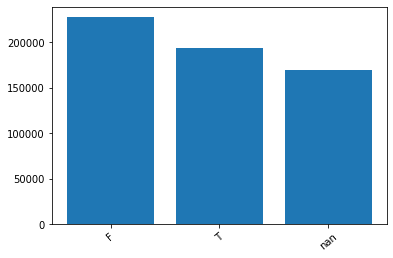

In [31]:
#M6
data = train['M6'].value_counts(dropna =False)

plt.figure()
plt.bar(np.array(data.index, dtype='str'), np.array(data.values))
plt.xticks(rotation=40)
plt.show()

In [42]:
groupby_isFraud = dict(list(train.groupby('isFraud')))

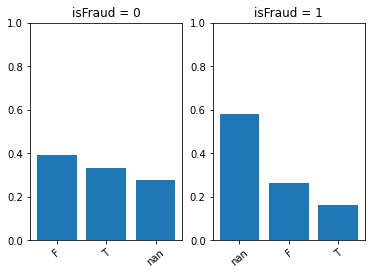

In [41]:
plt.figure()
plt.subplot(121)
plt.ylim(0.0,1.0)
data = groupby_isFraud[0]['M6'].value_counts(dropna =False)/groupby_isFraud[0].shape[0]
plt.title('isFraud = 0')
plt.bar(np.array(data.index, dtype='str'), np.array(data.values))
plt.xticks(rotation=40)


plt.subplot(122)
plt.ylim(0.0,1.0)
data = groupby_isFraud[1]['M6'].value_counts(dropna =False)/groupby_isFraud[1].shape[0]
plt.title('isFraud = 1')
plt.bar(np.array(data.index, dtype='str'), np.array(data.values))
plt.xticks(rotation=40)

plt.show()


On peut conclure que M6 ne suis pas un pattern. Du coup on la enleve.

In [46]:
# V{i}
train['V41'].value_counts()

1.0    421263
0.0       308
Name: V41, dtype: int64

In [47]:
# V{i}
train['V40'].value_counts()

0.0     357837
1.0      57473
2.0       4230
3.0       1046
4.0        400
5.0        209
6.0        145
7.0         78
8.0         50
10.0        29
9.0         26
14.0        16
11.0        14
12.0        12
13.0         3
15.0         1
23.0         1
24.0         1
Name: V40, dtype: int64

<BarContainer object of 17 artists>

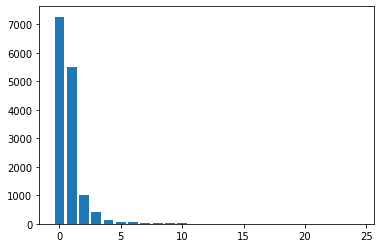

In [51]:
# V{i}
data = groupby_isFraud[1]['V40'].value_counts()

plt.bar(list(data.index), data.values)

<BarContainer object of 16 artists>

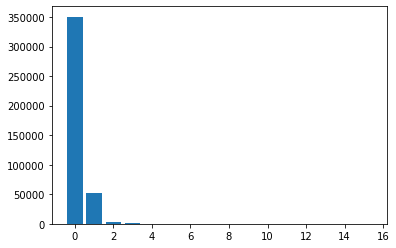

In [52]:
data = groupby_isFraud[0]['V40'].value_counts()

plt.bar(list(data.index), data.values)

#### 2. Drop2

In [29]:
train.drop(list(existing_data_train[existing_data_train['percent']<=0.8].index), axis = 1, inplace =True, errors='ignore')
test.drop(list(existing_data_test[existing_data_test['percent']<=0.8].index), axis = 1, inplace =True, errors='ignore')

In [28]:
print(train.shape)
print(test.shape)

(590540, 182)
(506691, 200)


In [30]:
existing_data_train[existing_data_train['percent']>0.8].head(-1).T

,P_emaildomain,V89,V90,V88,V92,V87,V93,V94,V84,V86,V91,V85,V83,V82,V81,V80,V79,V78,V77,V76,V75,D15,V73,V72,V71,V70,V74,V64,V66,V65,V63,V62,V61,V60,V59,V58,V57,V56,V55,V54,...,V293,V292,V291,V290,V287,V286,V285,V284,V280,V279,V306,V307,V305,V309,V310,V312,V308,V316,V317,V318,V319,TransactionAmt,TransactionDT,isFraud,C11,C12,C13,C14,C10,ProductCD,C7,C8,card1,C6,C5,C4,C3,C2,C1,C9
total,496084.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501427.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,...,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0
percent,0.840051,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849099,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,...,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [56]:
train['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
roadrunner.com         305
hotmail.es             305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
twc.com                230
n

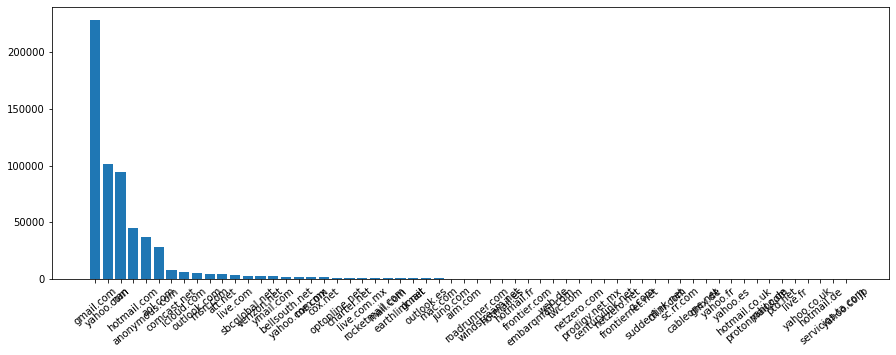

In [59]:
#
data = train['P_emaildomain'].value_counts(dropna =False)

plt.figure(figsize=(15,5))
plt.bar(np.array(data.index, dtype='str'), np.array(data.values))
plt.xticks(rotation=40)
plt.show()

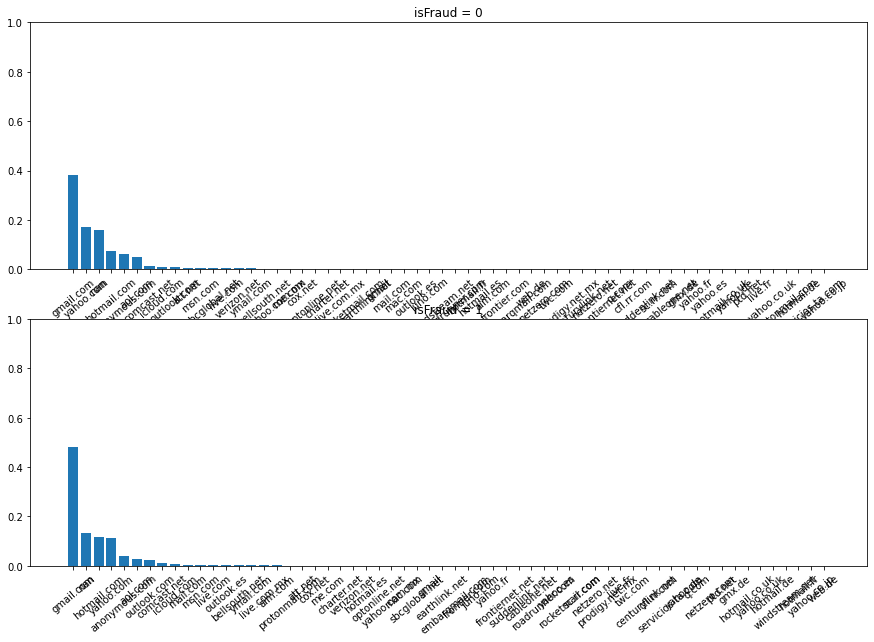

In [64]:
plt.figure(figsize=(15, 10),)
plt.subplot(211)
plt.ylim(0.0,1.0)
data = groupby_isFraud[0]['P_emaildomain'].value_counts(dropna =False)/groupby_isFraud[0].shape[0]
plt.title('isFraud = 0')
plt.bar(np.array(data.index, dtype='str'), np.array(data.values))
plt.xticks(rotation=40)


plt.subplot(212)
plt.ylim(0.0,1.0)
data = groupby_isFraud[1]['P_emaildomain'].value_counts(dropna =False)/groupby_isFraud[1].shape[0]
plt.title('isFraud = 1')
plt.bar(np.array(data.index, dtype='str'), np.array(data.values))
plt.xticks(rotation=40)

plt.show()

On peut pas distinguer un pattern pour isFraud à partir de la colonne P_emaildomain. Alors on la supprime.

In [31]:
train.drop('P_emaildomain',axis = 1, inplace =True, errors='ignore')
test.drop('P_emaildomain',axis = 1, inplace =True, errors='ignore')

In [34]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 181 columns):
 #   Column          Dtype   
---  ------          -----   
 0   TransactionID   int64   
 1   isFraud         int64   
 2   TransactionDT   int64   
 3   TransactionAmt  float64 
 4   ProductCD       category
 5   card1           category
 6   card2           category
 7   card3           category
 8   card4           category
 9   card5           category
 10  card6           category
 11  addr1           category
 12  addr2           category
 13  C1              float64 
 14  C2              float64 
 15  C3              float64 
 16  C4              float64 
 17  C5              float64 
 18  C6              float64 
 19  C7              float64 
 20  C8              float64 
 21  C9              float64 
 22  C10             float64 
 23  C11             float64 
 24  C12             float64 
 25  C13             float64 
 26  C14             float64 
 27  D1           

In [46]:
categorical_columns = ['ProductCD']+[f'card{i}' for i in range(1, 7)] + ['addr1','addr2']
print(train[categorical_columns].isna().sum())
train[categorical_columns].value_counts();

ProductCD        0
card1            0
card2         8933
card3         1565
card4         1577
card5         4259
card6         1571
addr1        65706
addr2        65706
dtype: int64


In [40]:
train[categorical_columns].dropna(axis = 0, how ='any').shape

(514648, 9)

In [44]:
# en cas on supprime toute ligne qui contient des valeurs manquantes
print(groupby_isFraud[0][categorical_columns].dropna(axis = 0, how ='any').shape)
print(groupby_isFraud[1][categorical_columns].dropna(axis = 0, how ='any').shape)

print(groupby_isFraud[0][categorical_columns].shape)
print(groupby_isFraud[1][categorical_columns].shape)

(502058, 9)
(12590, 9)
(569877, 9)
(20663, 9)


*** Si on procède de cette manière on va perdre trop de données. Essayant de voir autrement.

In [63]:
print(train.shape)
print(train.dropna(axis = 0, how ='any', thresh = 115).shape)

(590540, 181)
(521730, 181)


In [ ]:
# fill with mean & mode


https://dev.acquia.com/blog/how-to-handle-missing-data-in-machine-learning-5-techniques/09/07/2018/19651


https://www.datacamp.com/community/tutorials/categorical-data